# Tp LoRa

L'objectif de ce TP est d'apprendre à utiliser la technologie LoRa avec la carte STM32 L072Z. Nous allons configurer et tester deux scénarios :

Envoi de données vers The Things Network (TTN).
Communication directe entre deux cartes STM32.

Matériel requis :
- 2 cartes STM32 L072Z
- 1 ordinateur avec STM cube IDE installé


## envoi des données vers Tne Things Network

### Configuration de la passerelle

(partie a réaliser uniquement si la passerelle n'est pas deja configurée)

Pour configurer la passerelle, il faut etre sur le même réseau et se rendre a l'adresse 147.127.245.250
- Username : admin
- Password : centrale2022

<img src="img/gw_connexion.png" alt="Drawing" style="width: 600px;"/>

Configurer les paramètres de réseau en mode passerelle 
- LoraWan -> Network Settings
    - mode : packet Forwarder
    - Channel Plan : EU868

<img src="img/gw_paramNet.png" alt="Drawing" style="width: 600px;"/>




### Connexion avec The Things Network

Connectez votre carte à un ordinateur via USB.

Accedez au site https://eu1.cloud.thethings.network/console/
- id :  duiot
- mdp : duiot2020

Pour vérifier que la passerelle es bien configurée cliquez sur gateway, ici, on peut voir si la passerelle est connectée ou non.

<img src="img/ttn_gw.png" alt="Drawing" style="width: 600px;"/>

On peut alors voir si la passerelle et connéctée a TTN ou non 

<img src="img/ttn_gw_connected.png" alt="Drawing" style="width: 600px;"/>

Occupons nous maintenant de créer notre application
- cliquez sur applications

<img src="img/ttn_cnx.png" alt="Drawing" style="width: 600px;"/>

Vous avez maintenant la liste des applications déjà crées, créez votre propre application
- cliquez sur "add application"

<img src="img/ttn_app.png" alt="Drawing" style="width: 600px;"/>

Vous allez donc renseigner toutes les informations de votre application 
- remplir les infos de l'application

<img src="img/ttn_createApp.png" alt="Drawing" style="width: 600px;"/>

Une fois dans l'application, vous devez enregistrer les appareils liés à l'application
- cliquez sur "Register end device"

<img src="img/ttn_registerDevice.png" alt="Drawing" style="width: 600px;"/>

Vous devez ensuite rentrer les informations de votre appareil pour que celui-ci soit reconnu par l'application
- cliquez sur "Enter end device specifics manually"
- renseignez les informations de votre carte 
    - Europe 863-870 MHz (SF9 for RX2 - recommended)
    - LoRaWAN Specification 1.0.0
    - TS001 Technical Specification 1.0.0
    - AppEUI, DevEUI, ... voir le tableur sur moodle 

<img src="img/ttn_appCree.png" alt="Drawing" style="width: 600px;"/>

Vous pouvez maintenant avoir accès au panel de votre application, ici, vous pouvez voir toutes les communications et informations de votre application.
Sur le volet de gauche vous pouvez aussi avoir accès a différents onglets qui détaillent ces informations, vous avez aussi la possibilité de générer une clé API pour récupérer les données recues par TTN

<img src="img/ttn_appPanel.png" alt="Drawing" style="width: 600px;"/>



### code du STM32

Sur STM cube IDE : 
- Allez dans `file -> import -> Import ac6 System Workbench for STM32 Project`
- Chargez le projet `/home/local/Documents/StageIoT/STM/STM32CubeExpansion_LRWAN_V2.1.0/Projects/B-L072Z-LRWAN1/Applications/LoRaWAN/LoRaWAN_End_Node`
- Dans le Project explorer, allez dans le fichier `LoRaWAN/App/se-identity.h`
- Modifiez les valeurs LORAWAN_DEVICE_EUI, LORAWAN_JOIN_EUI, LORAWAN_DEVICE_ADDRESS, LORAWAN_APP_KEY, LORAWAN_NWK_KEY (lignes 98 à 125) par les valeurs entrées dans ttn


### Téléversement du Code sur la Carte

- Dans le project explorer allez dans le dossier `STM32CubeIDE`
- Faire clique droit sur `cmwx1zzabz_0xx` puis `run as` et `STM32 C/C++ Applicaiton`

<img src="img/stm_launch.png" alt="Drawing" style="width: 600px;"/>

- Tant que l'on ne change pas de projet on peut cliquer sur la fleche verte comme dans eclipse pour lancer le projet

### Communication via la liaison série

Nous allons voir l'état de la carte via sa liaison série.

- Allez dans un terminal et tapez `cutecom`
- Dans `Device` choisissez votre port série `/dev/ttyACMx`
- Allez dans `Settings` et vérifiez que le baudrate est bien a 115200

<img src="img/stm_cutecom.png" alt="Drawing" style="width: 600px;"/>

- Cliquez sur Open


## Communication directe entre deux cartes STM32 

Dans cette partie du TP, nous allons mettre en place une communication directe entre deux cartes STM32 utilisant la technologie LoRa en mode peer-to-peer (P2P).

Nous allons utiliser le code "ping pong" pour montrer la communication P2P entre les deux cartes en LoRa. Ce code permet à une carte de recevoir des messages et de répondre automatiquement.

Nous allons importer ce code de la manière suivante :
- Aller dans `file -> import -> Import ac6 System Workbench for STM32 Project`
- Chargez le projet `/home/local/Documents/StageIoT/STM/STM32CubeExpansion_LRWAN_V2.1.0/Projects/B-L072Z-LRWAN1/Applications/SubGHz_Phy/SubGHz_Phy_PingPong`
- Téléversez le code sur deux cartes STM et verifiez la communication via le port série


### Travail à réaliser
Nous allons étudier l'impact des paramètres LoRa, notamment le Spreading Factor (SF) et le Coding Rate (CR) sur les performances de la communication. Nous observerons particulièrement la qualité du signal reçu et le temps mis sur le support en fonction du couple Data Rate/Spreading Factor.

- Objectifs
    - Étudier l'impact du paramètre SF sur la qualité du signal reçu.
    - Analyser le temps de transmission en fonction du Spreading Factor et du Data Rate.
    - Observer l'effet de la charge du trafic en adaptant la durée entre deux transmissions.

- Tests à Réaliser

    - Variation du Spreading Factor (SF) :
        - Essayez des valeurs de spreading_factor.
            - modifier la ligne 94 du fichier `/SubGHz_Phy/App/subghz_phy_app.h`
        - Notez l'impact sur la robustesse du signal et la vitesse de transmission.

    - Variation du Coding Rate (CR) :
        - Essayez des valeurs de coding_rate.
            - modifier la ligne 95 du fichier `/SubGHz_Phy/App/subghz_phy_app.h`
        - Observez l'impact sur la qualité de la communication.

    - Variation de la distance entre les deux cartes
        - écartez les cartes et regardez l'impact sur les mesures (vous pouvez aller loin)


- Utilisez les statistiques renvoyées dans la liaison série pour analyser l'impact des différents paramètres :
    
    - RSSI (Received Signal Strength Indicator) : Force du signal reçu.
    - SNR (Signal-to-Noise Ratio) : Rapport signal sur bruit.
    



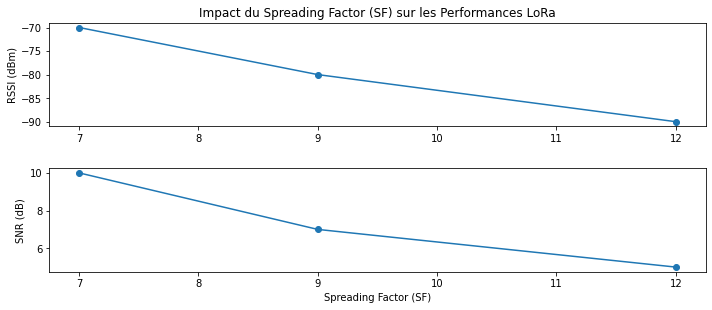

In [1]:
import matplotlib.pyplot as plt

# Données fictives pour illustration
sf_values      = [7, 9, 12]
rssi_values    = [-70, -80, -90]
snr_values     = [10, 7, 5]
tx_time_values = [50, 100, 200]

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(sf_values, rssi_values, 'o-')
plt.title('Impact du Spreading Factor (SF) sur les Performances LoRa')
plt.ylabel('RSSI (dBm)')

plt.subplot(3, 1, 2)
plt.plot(sf_values, snr_values, 'o-')
plt.ylabel('SNR (dB)')

plt.xlabel('Spreading Factor (SF)')

plt.tight_layout()
plt.show()